In [ ]:
from dask.distributed import Client, SSHCluster, default_client
import dask.bag as db
import dask.dataframe as dd
import numpy as np
import json
from IPython.display import clear_output
scheduler = "10.67.22.173" # 10.67.22.173 -- vm : mapdb-group9-2
worker1 = "10.67.22.153" # vm : mapdb-group9-2
worker2 = "10.67.22.150" # vm : mapdb-group9-3
worker3 = "10.67.22.183" # vm : mapdb-group9-4
class ClusterError(Exception):
    pass

try: ## This starts the cluster but if it was started and not closed, this will raise error, so
    cluster = SSHCluster(
    [scheduler,worker1,worker2, worker3],
    connect_options={"known_hosts": None},
    scheduler_options={"port": 8786, "dashboard_address": ":8797"}
    )
    client = Client(cluster)
except RuntimeError: # this is how to resume the cluster
    clear_output()
    client = Client(scheduler + ':8786') # restarts the cluster, by simply recalling it

display(client)
if len(client.ncores())!=3:
    raise ClusterError(f"ClusterError: The cluster is not properly set: n.{len(client.ncores())} instead of 3 ")
else:
    pass

In [18]:
import json
import re

path = "../data/30/document_parses/pdf_json/fff1194fa9a0e18d13a565a7a2355a584cb860b1.json"


with open(path, "r") as f:
    file = json.load(f)

#@dask.delayed
def parser(file:dict) -> str:
    """
    TO DO: insert opener here?? let's see how it goes w/map
    Takes in input a single dictionary, the one from json.load(.../pdf_json/*.json)
    and returns only bodytexts joined in a string.
    """
    sections = list(map(lambda section: section["text"], file["body_text"] ))
    return ''.join(sections)

#@dask.delayed
def cleaner(input:str) -> str:
    """
    Should clean strings from characters like commas and other things we don't wanna count.
    """
    lowered = input.lower()
    cleaned = re.sub(r'[^ a-z0-9]', '', lowered)
    return cleaned

#@dask.delayed
def word_count(input:str) -> dict:
    """
    The actual word count... i hope.
    """
    death = input.split()
    alicia = dict()
    for i in death:
        if i in alicia.keys():
            pass
        else:
            alicia[i] = death.count(i)
    return alicia


In [19]:
fine = word_count(cleaner(parser(file)))

<BarContainer object of 459 artists>

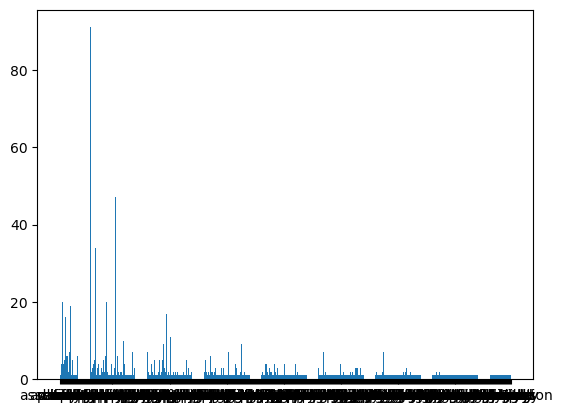

In [22]:
import matplotlib.pyplot as plt

keys = list(fine.keys())
vals = list(fine.values())
plt.bar(keys, vals)